In [2]:
from quantile_regression.fast_non_linear_vector_quantile_regression import FastNonLinearVectorQuantileRegression
from old_source_code.data import create_joint_x_y
import torch
from utils import TrainParams

X, Y = create_joint_x_y(1000)
device_type_and_specification = {
    "device": "cpu",
    "dtype": torch.float64
}

X_batch = torch.from_numpy(X).to(**device_type_and_specification)
Y_batch = torch.from_numpy(Y).to(**device_type_and_specification)
dataloader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_batch, Y_batch), batch_size=10, shuffle=True)

nlvqr = FastNonLinearVectorQuantileRegression(input_dimension=1, embedding_dimension=5, hidden_dimension=100, number_of_hidden_layers=1)
_ = nlvqr.fit(dataloader, train_params=TrainParams(num_epochs=2000, learning_rate=0.1, verbose=True))

# to save the model:
# nlvqr.save("nlvqr.pth")

# to load the model:
# _ = nlvqr.load("nlvqr.pth")

100%|██████████| 2000/2000 [00:20<00:00, 96.84it/s] 


/Users/vladimirkondratev/conditional_quantile_function/src/quantile_regression/fast_non_linear_vector_quantile_regression.py:142: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  point = torch.tensor(point)


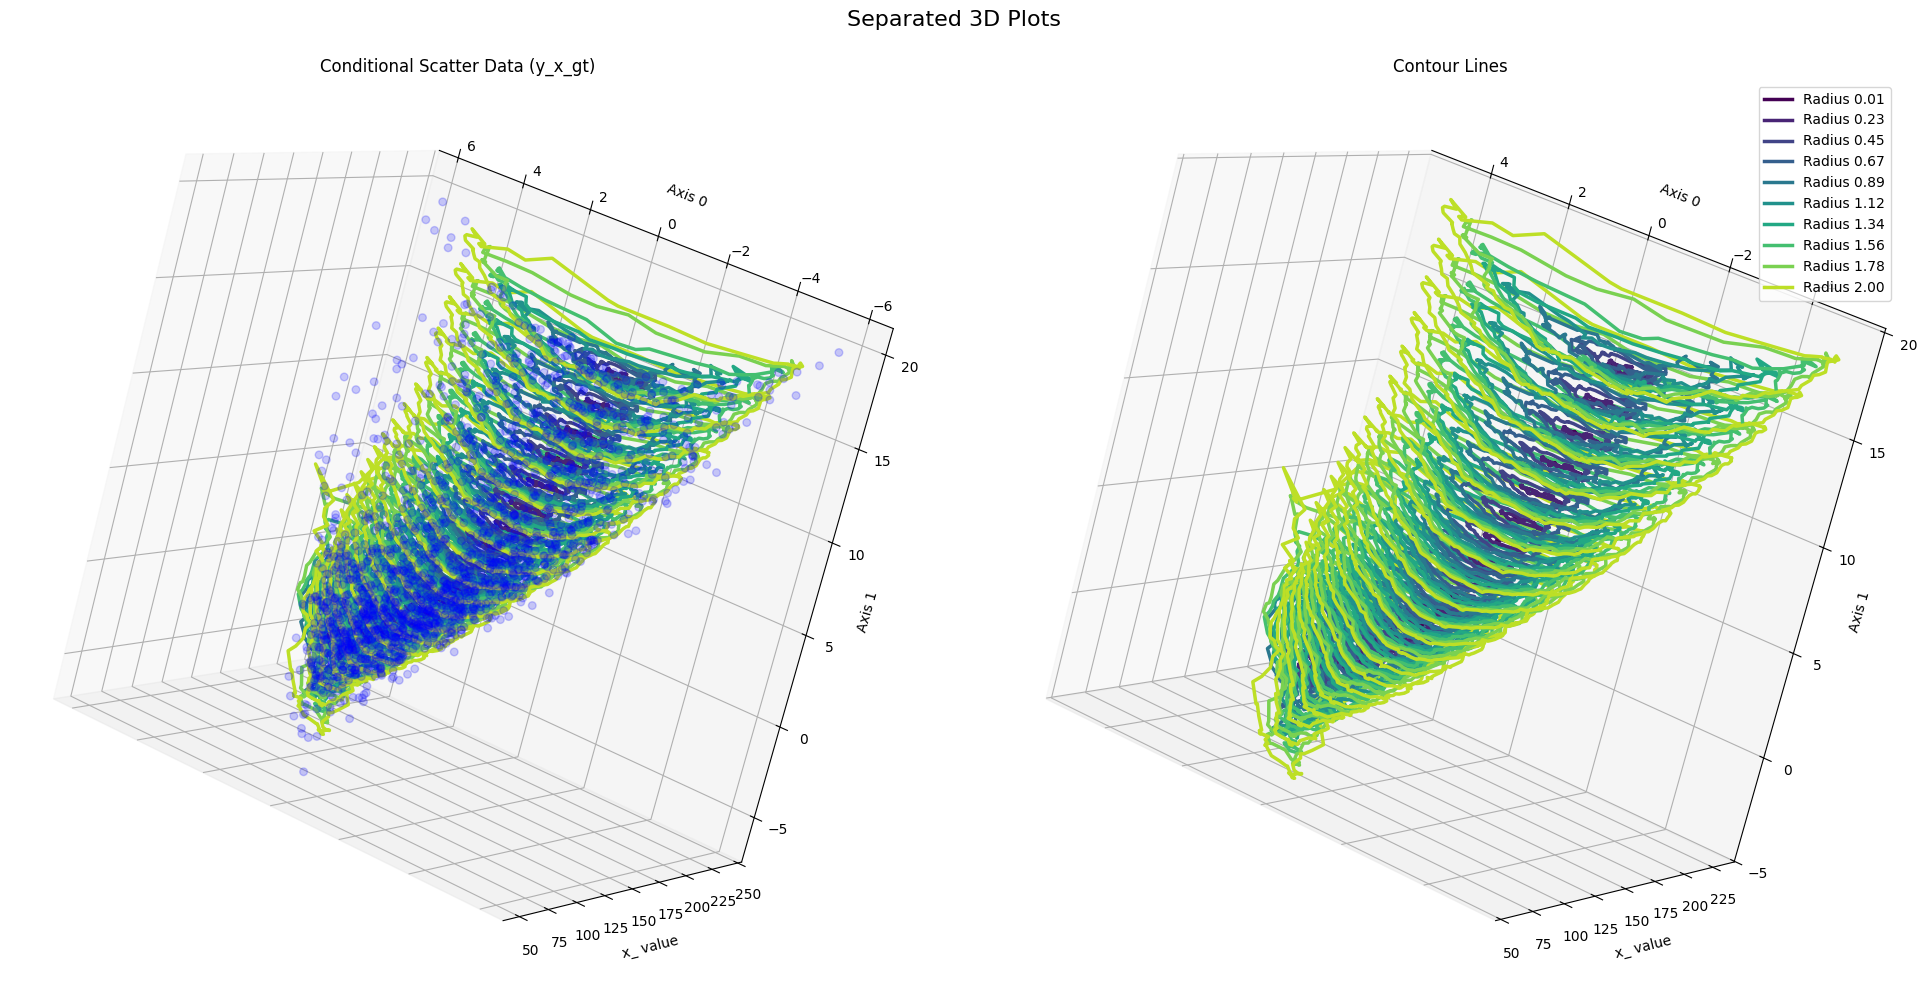

In [4]:
%matplotlib inline
from utils import plot_potentials_from_banana_dataset

plot_potentials_from_banana_dataset(model=nlvqr, device_and_dtype_specifications=device_type_and_specification)